<font size=7> Latency Pair Animations

In this notebook we create animations of when certain pairs neurons fire.

In [1]:
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrow
from human_hip.spike_data import curate_latencies, latency_times
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from human_hip.animate import animate_latencies

In [2]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb') as handle:
    sd = pickle.load(handle)

# Graph only Well Curated Latencies

In [3]:
good_pairs = curate_latencies(sd)

18496 Starting Pairs
567 pairs above sttc cutoff
360 pairs above latencency cutoff
Starting cross_sttc calculation... might take a minute
77 pairs between cross_sttc cutoffs


In [ ]:
animate_latencies(sd, good_pairs )

# Graphy latencies between 1-15ms

<font color="orange"> Make these functions

only do sttc cuttoff

In [3]:
# Get all latencies whose STTC is above some minimum STTC cuttoff
sttc_cutoff = 0.04
sttc_delta=20
print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")


18496 Starting Pairs
567 pairs above sttc cutoff


In [15]:
# Create raster of when latencies occur. "Neurons" are now neuron pairs (n1,n2), where n1->n2
latency_raster = {}
for pair in pairs:
    if directed:
        latency_raster[ (pair[0],pair[1]) ] =  latency_times( pair[0], pair[1], sd, ms_cutoff_low=latency_ms_cutoff_low, ms_cutoff_high=latency_ms_cutoff_high, positive_only=True )
        latency_raster[ (pair[1],pair[0]) ] =  latency_times( pair[1], pair[0], sd, ms_cutoff_low=latency_ms_cutoff_low, ms_cutoff_high=latency_ms_cutoff_high, positive_only=True )
    else:
        latency_raster[ (pair[0],pair[1]) ] = latency_times( pair[0], pair[1], sd, ms_cutoff_low=latency_ms_cutoff_low, ms_cutoff_high=latency_ms_cutoff_high, positive_only=False)
latency_raster = {k:v for k,v in latency_raster.items() if len(v)>0 } # remove empty lists
print(f"{sum([ len(x) for x in latency_raster.values() ])} latency events occured in total spikedata")

14443 latency events occured in total spikedata


14443 latency events occured in total spikedata
Making animation of 3.217 minutes
Saved animation to many_latencies.mp4


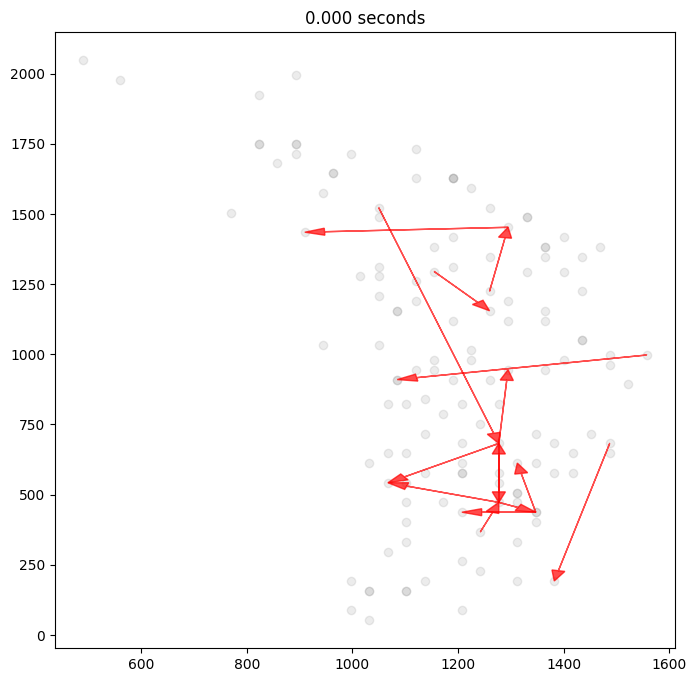

In [16]:
animate_latencies(sd, pairs, latency_ms_cutoff_low=2, latency_ms_cutoff_high=10, filename="many_latencies.mp4") 

14443 latency events occured in total spikedata
